In [1]:
import ehrapy as ep
import matplotlib.pyplot as plt

In [2]:
adata = ep.dt.diabetes_130_fairlearn()
ep.ad.move_to_obs(adata, ["medicare", "race", "age", "gender"], copy_obs=True)

AnnData object with n_obs × n_vars = 101766 × 24
    obs: 'race', 'gender', 'age', 'medicare'
    var: 'ehrapy_column_type'
    layers: 'original'

ValueError: '#3399CC' is not a valid palette name

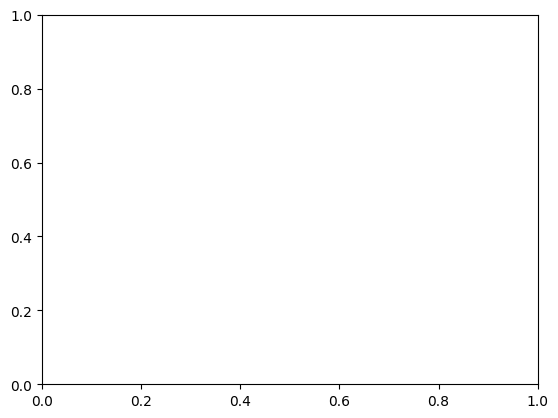

In [5]:
ct = ep.tl.CohortTracker(adata)
ct(adata, label="Initial Cohort")
ct.plot_cohort_barplot(
    subfigure_title=True,
    fontsize=12,
    yticks_labels={"age": "Age (%)", "gender": "Gender (%)", "race": "Race (%)", "medicare": "Medicare (%)"},
    legend_labels={"'30 years or younger'": "30 years or younger", "'30-60 years'": "30-60 years", "'Over 60 years'": "Over 60 years", "Unknown/Invalid": "Unknown"},
    legend_subtitles=True,
    legend_subtitles_names={"age": "Age", "gender": "Gender", "race": "Race", "medicare": "Medicare"},
    show=False
)
plt.savefig("selection_filtering_bias_1.png", dpi=300, bbox_inches="tight")

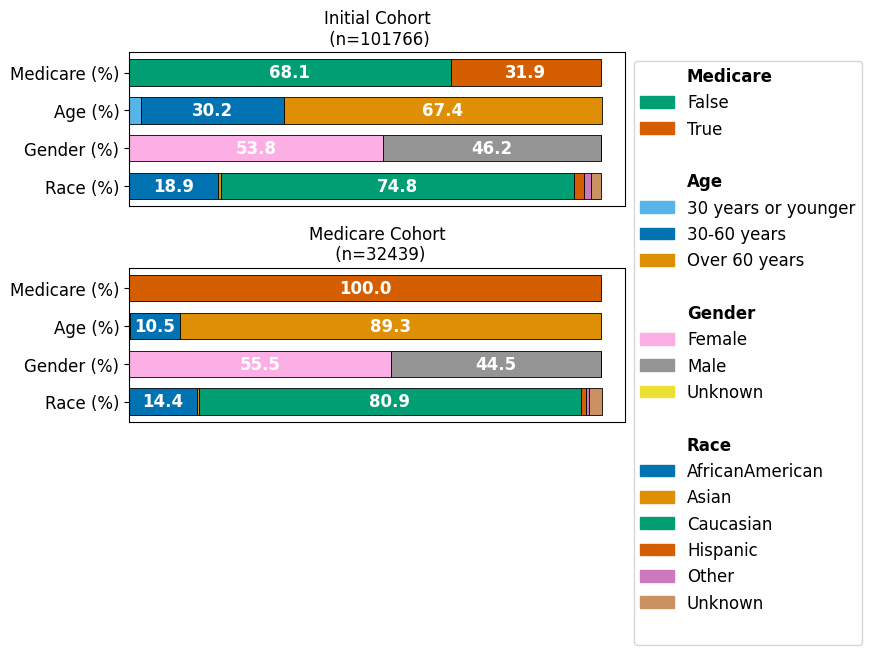

In [50]:
adata_filtered = adata[adata.obs["medicare"]].copy()
ct(adata_filtered, label="Medicare Cohort", operations_done="Filtering for Medicare")

fig, ax = ct.plot_cohort_barplot(
    subfigure_title=True,
    fontsize=12,
    yticks_labels={"age": "Age (%)", "gender": "Gender (%)", "race": "Race (%)", "medicare": "Medicare (%)"},
    legend_labels={"'30 years or younger'": "30 years or younger", "'30-60 years'": "30-60 years", "'Over 60 years'": "Over 60 years", "Unknown/Invalid": "Unknown"},
    legend_subtitles=True,
    legend_subtitles_names={"age": "Age", "gender": "Gender", "race": "Race", "medicare": "Medicare"},
    show=False
)
fig.subplots_adjust(hspace=0.4)
plt.savefig("selection_filtering_bias_2.png", dpi=300, bbox_inches="tight")

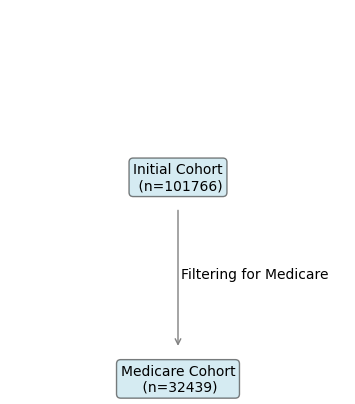

In [51]:
ct.plot_flowchart(show=False)
plt.savefig("selection_filtering_bias_3.png", dpi=300, bbox_inches="tight")